# Discovering patterns in data

This lab will first introduce you to key concepts in machine learning for social science. Our focus will be on a particular branch of machine learning called unsupervised learning, which includes techniques for clustering and dimensionality reduction. We will then focus on hands-on data analysis with the `scikit-learn` library for machine learning in Python. Our research objective is to group UK counties with similar mobility trends using two popular techniques of unsupervised learning: _k_-means clustering and Principal Components Analysis (PCA).

## Key themes
* Definition of machine learning.
* Supervised and unsupervised learning.
* Introduction to unsupervised learning techniques, including clustering (_k_-means) and dimensionality reduction (Principal Component Analysis (PCA)).
* Hands-on machine learning with `scikit-learn`.
* Data-informed model parameter selection.

## Learning resources

<i class="fas fa-scroll"></i> M Molina & F Garip. 2019. [Machine learning for sociology.](https://osf.io/preprints/socarxiv/a6r9g/) _Annual Review of Sociology._ [Link](https://osf.io/preprints/socarxiv/a6r9g/) to an open-access version of the article available at the Open Science Framework.

<i class="fas fa-book"></i> Ian Foster, Rayid Ghani, Ron S. Jarmin, Frauke Kreuter, Julia Lane. 2021. [Chapter 7: Machine Learning](https://textbook.coleridgeinitiative.org/chap-ml.html). In _Big Data and Social Science_ (2nd edition).

<i class="fas fa-play-circle"></i> [What is Machine Learning?](https://www.youtube.com/watch?v=f_uwKZIAeM0) OxfordSparks.


### Additional resources

<i class="fas fa-book"></i> Kosuke Imai. 2018. Chapter 3.7.3: The _k_-means algorithm. In _Quantitative Social Science_. Princeton University Press. 

<i class="fas fa-book"></i> Jake VanderPlas. 2016. [In Depth: k-Means Clustering](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html). In 
_Python Data Science Handbook_.

<i class="fas fa-book"></i> Sebastian Raschka. 2018. Python Machine Learning. Packt Publishing. 

<br>


# Machine Learning: What is it? What is it good for?
> Field of study that gives computers the ability to learn [from  data] without being explicitly programmed.
>
> *—Arthur Samuel, 1959*

## Data science tasks we can solve using machine learning
1. Pattern discovery using unsupervised machine learning
2. Prediction using supervised machine learning

## Unsupervised and Supervised learning

Two types of machine learning are often distinguished in the literature: unsupervised learning and supervised learning

1. Unsupervised learning — no outcome variable / labeled data are available, and the structure of data is unknown. The goal of unsupervised learning is to explore the structure of data and discover hidden structures and meaningful information without the guidance of outcome variable / labeled data. To uncover such hidden structures in data, we use unsupervised learning techniques, including clustering (e.g., k-Means) and dimensionality reduction (e.g., Principal Component Analysis (PCA)).

> <i class="fas fa-play-circle"></i> [Unsupervised Learning](https://www.youtube.com/watch?v=jAA2g9ItoAc), Machine Learning's course by Andrew Ng

2. Supervised learning — learn a model from labeled training data or outcome variable that would enable us to make predictions about unseen or future data. The learning is called supervised because the outcome variable as well as labels (e.g., email Spam or Ham where 'Ham' is e-mail that is not Spam) that guide the learning process are already known.

> <i class="fas fa-play-circle"></i> [Supervised learning](https://www.youtube.com/watch?v=bQI5uDxrFfA), Machine learning's course by Andrew Ng

In this lab, we will be focusing on unsupervised learning. 

# Research problem: clustering counties by mobility

Let's formulate our simple research problem: to inform a public health intervention, we need to group a number of counties in the UK with similar mobility trends. We frame this problem as a clustering task and perform _k_-means clustering to sort the UK counties into clusters with similar mobility trends.  

# _k_-means clustering

Clustering is an exploratory data analysis (EDA) task that aims to group a set of observations into subgroups or clusters (without any prior information about cluster membership) such that observations assigned to the same cluster are more similar to each other than those in other clusters. To cluster observations in our mobility data, we will employ the _k_-means algorithm.

### The _k_-means algorithm

> The k-means algorithm is an iterative algorithm in which a set of operations are repeatedly performed until a noticeable difference in results is no longer produced. The goal of the algorithm is to split the data into _k_ similar groups where each group is associated with its centroid, which is equal to the within-group mean. This is done by first assigning each observation to its closest cluster and then computing the centroid of each cluster based on this new cluster assignments. These two step are iterated until the cluster assignment no longer changes.
>
> The _k_-means algorithm produces the prespecified number of clusters _k_ and consists of the following steps: 
>1. Choose the initial centroids of _k_ clusters. 
>2. Given the centroids, assign each observations to a cluster whose centroid is the closest to that observation. 
>3. Choose the new centroid of each cluster whose coordinate equals the within-cluster mean of the corresponding variable.
>4. Repeat Steps 2 and 3 until cluster assignment no longer change.
>
> —Kosuke Imai. 2018. Quantitative Social Science. Princeton University Press.

See also <i class="fas fa-book"></i> [Jake VanderPlas' Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html).

On k-Means Advantages and Disadvantages, read [here](https://developers.google.com/machine-learning/clustering/algorithm/advantages-disadvantages). 

### Recent applications of _k_-means clustering in social sciences

<i class="fas fa-scroll"></i> Garip, F. 2012. [Discovering diverse mechanisms of migration: The Mexico–US Stream 1970–2000](https://www.jstor.org/stable/41857399). Population and Development Review, 38(3), 393-433. [Open access version](https://dash.harvard.edu/bitstream/handle/1/10872801/garip_pdr_2012.pdf;jsessionid=17835B14A077877CBC9516BC9A1D890E?sequence=1).
 
<i class="fas fa-scroll"></i> Bail, C. A. (2008). [The configuration of symbolic boundaries against immigrants in Europe](https://www.jstor.org/stable/25472513). American Sociological Review, 73(1), 37-59.

# Let's get coding with `scikit-learn`

[Scikit-learn](https://scikit-learn.org/stable/) is simple, efficient, and widely used library for machine learning in Python.  

In [1]:
# Import libraries for today's lab

# Data analysis & visualisation
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(font_scale=1.5)
%matplotlib inline

# Suppress warnings to avoid potential confusion
import warnings

# Machine learning
from sklearn.cluster import KMeans  # For performing k-means
from sklearn.decomposition import PCA  # For performing PCA
from sklearn.preprocessing import StandardScaler  # For standartising data

warnings.filterwarnings("ignore")

### Load and process the mobility data, select UK data and compute mean mobility trends 

In [2]:
# Load the mobility data
mobility_trends_complete = pd.read_csv(
    "https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv",
    parse_dates=["date"],
)

In [3]:
mobility_trends_complete

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9900501,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2022-05-10,NaN,NaN,NaN,NaN,126.0,NaN
9900502,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2022-05-11,NaN,NaN,NaN,NaN,129.0,NaN
9900503,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2022-05-12,NaN,NaN,NaN,NaN,116.0,NaN
9900504,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2022-05-13,NaN,NaN,NaN,NaN,118.0,NaN


Select a manageable subset of the dataset covering the period from 15 February 2020 to 30 June 2021 using the functions `subperiod_mobility_trends()` and `rename_mobility_trends()` we defined in the previous chapter *Exploratory Data Analysis and Visualisation*. 

In [4]:
# %load preprocess_mobility_trends.py


def subperiod_mobility_trends(data, start_date, end_date):
    """
    Add your mobility data in `data`.

    This function selects a subperiod of the mobility data based on prespecified start data and end date.
    """
    mobility_trends = data[
        data["date"].isin(pd.date_range(start=start_date, end=end_date))
    ]
    return mobility_trends


def rename_mobility_trends(data):
    """
    This function renames the column headings of the six mobility categories.
    """
    mobility_trends_renamed = data.rename(
        columns={
            "retail_and_recreation_percent_change_from_baseline": "Retail_Recreation",
            "grocery_and_pharmacy_percent_change_from_baseline": "Grocery_Pharmacy",
            "parks_percent_change_from_baseline": "Parks",
            "transit_stations_percent_change_from_baseline": "Transit_stations",
            "workplaces_percent_change_from_baseline": "Workplaces",
            "residential_percent_change_from_baseline": "Residential",
        }
    )
    return mobility_trends_renamed

In [5]:
mobility_trends = subperiod_mobility_trends(
    mobility_trends_complete, "2020-02-15", "2021-06-30"
)

mobility_trends

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9900273,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-06-24,NaN,NaN,NaN,NaN,7.0,NaN
9900274,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-06-25,NaN,NaN,NaN,NaN,13.0,NaN
9900275,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-06-28,NaN,NaN,NaN,NaN,-3.0,NaN
9900276,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-06-29,NaN,NaN,NaN,NaN,12.0,NaN


In [6]:
mobility_trends = rename_mobility_trends(mobility_trends)
mobility_trends

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,Retail_Recreation,Grocery_Pharmacy,Parks,Transit_stations,Workplaces,Residential
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9900273,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-06-24,NaN,NaN,NaN,NaN,7.0,NaN
9900274,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-06-25,NaN,NaN,NaN,NaN,13.0,NaN
9900275,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-06-28,NaN,NaN,NaN,NaN,-3.0,NaN
9900276,ZW,Zimbabwe,Midlands Province,Kwekwe,NaN,NaN,NaN,ChIJRcIZ3-FJNBkRRsj55IcLpfU,2021-06-29,NaN,NaN,NaN,NaN,12.0,NaN


Select data for the United Kingdom and compute mean mobility trends for each county.

In [7]:
# Select data for the UK
mobility_trends_UK = mobility_trends[
    mobility_trends["country_region"] == "United Kingdom"
]

# Compute mean mobility trends for each UK county per mobility category
# and assign the result to the variable mobility_trends_UK_mean
mobility_trends_UK_mean = mobility_trends_UK.groupby("sub_region_1")[
    [
        "Retail_Recreation",
        "Grocery_Pharmacy",
        "Parks",
        "Transit_stations",
        "Workplaces",
        "Residential",
    ]
].mean()

mobility_trends_UK_mean

,Retail_Recreation,Grocery_Pharmacy,Parks,Transit_stations,Workplaces,Residential
sub_region_1,,,,,,
Aberdeen City,-50.046371,-10.722567,20.557692,-46.127016,-42.489919,14.567010
Aberdeenshire,-28.253669,-11.248447,22.474684,-39.953878,-37.207661,12.222222
Angus Council,-25.955975,-6.125786,13.982143,-31.150943,-33.542339,10.831551
Antrim and Newtownabbey,-29.377358,-7.465409,-29.134328,-53.752621,-33.679435,12.859031
Ards and North Down,-27.262055,0.452830,6.838298,-41.721311,-35.991935,12.679039
...,...,...,...,...,...,...
Windsor and Maidenhead,-42.714885,-11.178197,0.379455,-43.693920,-43.711694,16.709220
Wokingham,-39.044025,-16.285115,30.458101,-51.299790,-45.034274,18.237327
Worcestershire,-36.025497,-9.990563,26.511954,-34.033107,-33.779758,12.112019


### The _k_-means clustering algorithm in `scikit-learn` 

The `KMeans` estimator class in scikit-learn allows you to set up the algorithm parameters before fitting the estimator to the data. 

Parameters of the `KMeans` algorithm include:

- `n_clusters` — Number of clusters `k` to form (same as the number of centroids to generate).

- `init` _('random' or 'k-means++', default='k-means++')_ Method of selection of initial centroids. 'random' selects n_clusters observations (rows) at random from data for the initial centroids. ‘k-means++’ selects initial cluster centers in a way that speeds up convergence.

- `n_init` _(default = 10)_ — Number of times the k-means algorithm will be run with different centroid seeds. The final results will be the best output of n_init consecutive runs. The best output is measured in terms of the sum of squared distances of samples to their closest cluster center.

- `max_iterint` _(default=300)_ — Maximum number of iterations of the k-means algorithm for a single run.

- `random_state` _(default=None)_ For computational reproducibility, determines random number generation for centroid initialization.

We instantiate the KMeans class with the following arguments:

In [8]:
kmeans = KMeans(n_clusters=3, init="k-means++", n_init=10, max_iter=300, random_state=0)

kmeans

KMeans(n_clusters=3, random_state=0)

# Data preprocessing

We preprocess the data in a format expected by the `scikit-learn` library. As part of the data preprocessing, we first remove countries with one or more NaN (Not a Number) using the Pandas method `dropna()`. Although some `scikit-learn` functions, such as `StandardScaler()`, handle NaNs, others, such as `fit()`, may require fine-tuning, so we remove NaNs at this stage to avoid unexpected downstream problems.

:::{tip}
`scikit-learn` works on any numeric data stored as NumPy arrays, SciPy sparse matrices, or (nowadays) pandas DataFrame. If needed, you can convert Pandas DataFrame into a NumPy array using the Pandas method `to_numpy()`.
:::

In [9]:
# Drop NaNs from the DataFrame
mobility_trends_UK_mean_NaNdrop = mobility_trends_UK_mean.dropna()
mobility_trends_UK_mean_NaNdrop

,Retail_Recreation,Grocery_Pharmacy,Parks,Transit_stations,Workplaces,Residential
sub_region_1,,,,,,
Aberdeen City,-50.046371,-10.722567,20.557692,-46.127016,-42.489919,14.567010
Aberdeenshire,-28.253669,-11.248447,22.474684,-39.953878,-37.207661,12.222222
Angus Council,-25.955975,-6.125786,13.982143,-31.150943,-33.542339,10.831551
Antrim and Newtownabbey,-29.377358,-7.465409,-29.134328,-53.752621,-33.679435,12.859031
Ards and North Down,-27.262055,0.452830,6.838298,-41.721311,-35.991935,12.679039
...,...,...,...,...,...,...
Windsor and Maidenhead,-42.714885,-11.178197,0.379455,-43.693920,-43.711694,16.709220
Wokingham,-39.044025,-16.285115,30.458101,-51.299790,-45.034274,18.237327
Worcestershire,-36.025497,-9.990563,26.511954,-34.033107,-33.779758,12.112019


# Data standardisation

It is a good practice to standardise our input features or variables before applying the k-means algorithm. Standardisation of input features in a data set is a common requirement for many statistical and machine learning estimators. By standardising individual features, all features are converted to the same scale so that the output of the clustering procedure is not influenced by how individual features are measured. 

In our example data, the six features are measured on a similar scale so one may argue that standardisation is not strictly necessary but we will perform it so that the procedure is part of your data analysis workflow. 

The `sklearn.preprocessing` module includes [`StandardScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler) among other methods for data scaling. The `StandardScaler` method calculates a standard score or _z-score_ of a sample observation `x` as `z = (x - M) / SD` where M is the mean of the sample observations and SD is the standard deviation of the sample observations. In simple words, for each observation in a column, we subtract the mean and divide by the standard deviation of that column.

In [10]:
# Data standardisation
scaler = StandardScaler()  # Initialising the scaler using the default arguments
mobility_trends_UK_standardised = scaler.fit_transform(
    mobility_trends_UK_mean_NaNdrop
)  # Fit to input data (continuous variable) and return the standardised variables

mobility_trends_UK_standardised

array([[-2.41537629e+00, -5.87410490e-01,  2.10134074e-01,
        -7.91288930e-01, -1.67445518e+00,  1.27693514e+00],
       [ 1.31187764e+00, -6.92727365e-01,  2.89076997e-01,
        -1.75449527e-01, -4.93614030e-01,  5.60796729e-02],
       [ 1.70485729e+00,  3.33177282e-01, -6.06512500e-02,
         7.02741514e-01,  3.25763531e-01, -6.67998047e-01],
       [ 1.11969050e+00,  6.48938482e-02, -1.83621506e+00,
        -1.55202810e+00,  2.95115745e-01,  3.87645364e-01],
       [ 1.48147561e+00,  1.65066306e+00, -3.54839347e-01,
        -3.51770707e-01, -2.21840285e-01,  2.93929581e-01],
       [ 2.00258288e+00,  2.11421107e-01,  3.05692453e-01,
         2.65069849e+00,  3.83734106e-01, -1.67810664e+00],
       [ 1.09194483e+00,  6.58562770e-01, -4.56719269e-01,
         4.51770033e-01,  9.42324863e-01, -8.67190528e-01],
       [-2.21396518e+00, -1.85507507e+00,  4.28819439e-01,
        -9.18325110e-01, -2.03772158e+00,  1.31997203e+00],
       [-3.28335111e-01, -9.81312186e-01, -4.813

In the above cell, we printed out the full arrays. This may be necessary for research transparency but in some settings, for example when you deal with large data, may not be practical. In such settings, you could select and print out only a couple of rows. For example, to print out the first 3 rows, you type in:    

In [11]:
mobility_trends_UK_standardised[0:3,]

array([[-2.41537629, -0.58741049,  0.21013407, -0.79128893, -1.67445518,
         1.27693514],
       [ 1.31187764, -0.69272736,  0.289077  , -0.17544953, -0.49361403,
         0.05607967],
       [ 1.70485729,  0.33317728, -0.06065125,  0.70274151,  0.32576353,
        -0.66799805]])

We now fit the k-means class we already created (`kmeans`) to our data. This will perform 10 runs of the k-means algorithm (each with a different centroid seed) on your data with a maximum of 300 iterations per run:

In [12]:
kmeans.fit(mobility_trends_UK_standardised)

KMeans(n_clusters=3, random_state=0)

You can access estimator's learned parameters using an underscore suffix '_'. For example, the attribute `labels_` will display the cluster each observation or sample (in our example, county) belongs to. The labels of the clusters can be accessed by typing your k-means object (which we called 'kmeans') followed by a '.' and the `labels_` attribute.

In [13]:
kmeans.labels_

array([2, 0, 1, 0, 1, 1, 1, 2, 0, 2, 0, 1, 0, 2, 0, 2, 2, 2, 0, 2, 2, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       2, 0, 0, 1, 1, 0, 2, 0, 2, 0, 1, 0, 0, 1, 2, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 1, 2, 1, 0, 0, 1, 1, 2, 1, 0,
       2, 1, 0, 2, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 2], dtype=int32)

The cluster labels indicate that, for example, the first county, Aberdeen City, is assign to cluster 2, the second county, Aberdeenshire, to cluster 0, and so on.

You can also access the coordinates of cluster centers using the `cluster_centers_` attribute. This will show the means of the points in each cluster for each of the six variables.

In [14]:
kmeans.cluster_centers_

array([[-0.06582254, -0.20255281, -0.37011903, -0.23552421,  0.08304705,
         0.02092666],
       [ 0.78930156,  0.86012023,  0.41426658,  0.911355  ,  0.70390283,
        -0.80759439],
       [-1.32044187, -1.1068233 ,  0.15879976, -1.11968451, -1.53739783,
         1.4688833 ]])

You can include the cluster assignment as a column in your original DataFrame. Let's name the new column 'clusters'.


In [15]:
mobility_trends_UK_mean_NaNdrop["clusters"] = kmeans.labels_
mobility_trends_UK_mean_NaNdrop

,Retail_Recreation,Grocery_Pharmacy,Parks,Transit_stations,Workplaces,Residential,clusters
sub_region_1,,,,,,,
Aberdeen City,-50.046371,-10.722567,20.557692,-46.127016,-42.489919,14.567010,2
Aberdeenshire,-28.253669,-11.248447,22.474684,-39.953878,-37.207661,12.222222,0
Angus Council,-25.955975,-6.125786,13.982143,-31.150943,-33.542339,10.831551,1
Antrim and Newtownabbey,-29.377358,-7.465409,-29.134328,-53.752621,-33.679435,12.859031,0
Ards and North Down,-27.262055,0.452830,6.838298,-41.721311,-35.991935,12.679039,1
...,...,...,...,...,...,...,...
Windsor and Maidenhead,-42.714885,-11.178197,0.379455,-43.693920,-43.711694,16.709220,2
Wokingham,-39.044025,-16.285115,30.458101,-51.299790,-45.034274,18.237327,2
Worcestershire,-36.025497,-9.990563,26.511954,-34.033107,-33.779758,12.112019,0


# Choosing the optimal number of clusters

In the example above, our choice of the number of clusters, _k_, was arbitrary. Let's find a more informative method of choosing the optimal _k_ for our data. One such method is the [Elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) for choosing optimal _k_. 

Using the Elbow method, we run the k-means algorithm with various values of _k_ and plot each value of _k_ against the sum of squared distances between each data point (county in the UK) and its cluster centroid. For the case of _k_ = 1 all data points will be assigned to the same cluster, resulting in higher sum of squared distances. As _k_ increases, the sum of squared distances will be close to zero because each data point would be assigned to its own cluster.

We perform multiple runs of the k-means clustering algorithm using a `for` loop.

# Performing `for` loop

A `for` loop is used to repeatedly execute a block of code, and is perfect fit for repeatedly executing the k-means algorithm. The `for` loop will iterate over a sequence of _k_ values, and for each value of _k_ will estimate the k-means algorithm. 

Let's first look at a simple example of a `for` loop:

In [16]:
for number in range(1, 4):
    print(number)

1
2
3


In this example (and in `for` loops in general), there are two parts: 
 * `for` loop statement, which in this example is '`for` number in range (1,4):'
    * `number` is the variable name; we could have specified a different variable name;
    * `range (1,4)` specifies the set of values to loop or iterate over; `range (1,4)` is the range of numbers 1, 2, 3. The first argument (1) is the starting point, and the second argument (4) is the endpoint (not included in the range)  
    * the word 'in' connects the two components in the `for` loop statement
    * the `for` loop statement ends in a colon ':'.
 * the loop body, which contains the code to be executed at each iteration of the `for` loop. Each line in the loop body is indented four spaces, and this indentation is how the interpreter knows that a line is part of the loop or not. In our example, 'print(number)' is the loop body.

At each iteration of the `for` loop, the variable `number` is assigned the next number in the range from 1 to 3, and then the value of `number` is printed. The loop runs once for each number in the sequence from 1 to 3, so the body loop 'print(number)' executes 3 times. 

This loop description draws on the _Real Python's_ book [Python Basics](https://realpython.com/tutorials/basics/) (pages 153–154) and on the [Kaggle's Python tutorial](https://www.kaggle.com/colinmorris/loops-and-list-comprehensions).

## Choosing _k_ via `for` loop
We are now ready to apply the `for` loop to the k-means algorithm.
In the code below, the `for` loop statement is '`for` k in K' where _k_ is the variable name and _K_ is the set of values ranging from 1 to 30. The loop body contains the three lines of code related to the `k-means()` initiation, estimation, and output. Each of the three lines in the loop body are indented four spaces. The loop will run 30 times, so all three lines related to the `k-means()` algorithm will be executed 30 times. 

In [17]:
# Run the k-means algorithm for values of k between 1 and 30

Sum_of_squared_distances = []  # Initialise a list

K = range(
    1, 31
)  # range with a starting point 1 and endpoint 31, which is not included in the range
for k in K:  # a for loop iterating over values of k ranging from 1 to 30
    kmeans = KMeans(n_clusters=k)  # Initialise the KMeans estimator for a value of k
    kmeans.fit(
        mobility_trends_UK_standardised
    )  # Perform the KMeans estimator by the fit() method
    Sum_of_squared_distances.append(
        kmeans.inertia_
    )  # Store the sum of squared distances (stored in kmeans.inertia_)
    # for each run using the Python append() function.

In [18]:
Sum_of_squared_distances

[846.0,
 547.7080256569716,
 429.7112613888795,
 365.4782968827096,
 328.8362897853743,
 301.72829951678796,
 281.05116080411847,
 262.8764097559398,
 251.88350703120256,
 239.34973620094246,
 223.86683466112927,
 214.68357391767273,
 209.50534998708247,
 197.3101329363527,
 189.8774747310233,
 183.84087640511768,
 177.90242231870533,
 171.01789694172618,
 162.46276850451392,
 159.95180340703382,
 152.35221938560662,
 145.9763201437044,
 142.81737201523777,
 137.44933254954873,
 134.80252297181383,
 129.93053030365422,
 123.79731323466231,
 119.02326607285883,
 114.9870769137471,
 111.87382179317166]

# Elbow plot 

Let's plot k against the sum of squared distances. The plot below shows how the sum of squared distances varies with values of _k_ between 1 and 30.

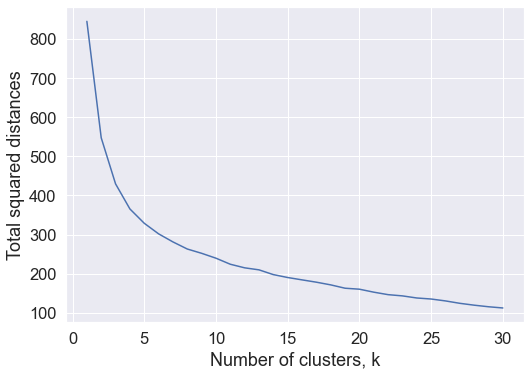

In [19]:
# Plot size
plt.figure(figsize=(8.2, 5.8))

# Generate the plot
grid = sns.lineplot(x=K, y=Sum_of_squared_distances)

# Add x and y labels
labels = grid.set(xlabel="Number of clusters, k", ylabel="Total squared distances")

For our data set, the elbow of the curve (where the curve "bends") is not apparent but total squared distances seem to decrease slowly after _k_ = 4. So we rerun our k-means algorithm with _k_ = 4.

In [20]:
k = 4
kmeans_k4 = KMeans(
    n_clusters=k, init="k-means++", n_init=10, max_iter=300, random_state=0
)

kmeans_k4.fit_transform(mobility_trends_UK_standardised)

array([[5.04566964, 4.50949325, 3.01211976, 1.22287598],
       [2.47693818, 2.62868693, 1.62080111, 3.45425377],
       [1.3003252 , 2.26931091, 2.42065505, 4.87648492],
       [3.78652204, 1.69736822, 2.80123963, 4.08388795],
       [2.43619727, 2.27100614, 2.6755362 , 4.50826352],
       [2.35336613, 4.06071712, 4.12945515, 6.48256892],
       [1.19812634, 1.69699685, 2.36632043, 4.95119228],
       [5.63435577, 5.12630547, 3.47305719, 1.24210402],
       [3.31527914, 2.26316156, 1.36184738, 2.64584341],
       [3.91107752, 2.74699518, 1.73162013, 1.61362137],
       [3.23295316, 1.57734068, 2.87257396, 4.69992362],
       [1.42323139, 2.99252444, 3.2625403 , 5.80151349],
       [1.9868273 , 1.08868625, 1.36774609, 3.78215571],
       [4.81014859, 4.0108717 , 2.66323944, 0.7956978 ],
       [2.42377329, 1.54752186, 1.22286252, 3.2322439 ],
       [4.95676567, 4.57502553, 2.8127199 , 0.88207805],
       [6.0778808 , 5.76623296, 3.96517641, 1.80031318],
       [4.00324484, 3.53155206,

Let's view to which cluster each observation or sample (in our example, UK county) in our data set was assigned to:

In [21]:
kmeans_k4.labels_

array([3, 2, 0, 1, 1, 0, 0, 3, 2, 3, 1, 0, 1, 3, 2, 3, 3, 3, 1, 3, 3, 0,
       0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 2, 0, 1, 0, 0, 0, 2, 0, 1, 0, 0,
       3, 2, 2, 1, 0, 2, 3, 2, 3, 2, 0, 2, 1, 0, 3, 0, 1, 0, 0, 2, 2, 0,
       2, 2, 0, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 1, 0,
       2, 0, 2, 0, 3, 2, 3, 0, 2, 1, 2, 2, 0, 3, 0, 2, 1, 0, 0, 3, 0, 2,
       2, 0, 2, 3, 2, 2, 3, 0, 2, 0, 3, 2, 2, 2, 0, 2, 2, 2, 2, 3, 1, 1,
       2, 2, 2, 2, 3, 3, 2, 2, 3], dtype=int32)

Here are also the centers of the four detected clusters:

In [22]:
kmeans_k4.cluster_centers_

array([[ 0.77303297,  0.7952798 ,  0.53804385,  0.9729365 ,  0.71215567,
        -0.83613574],
       [ 0.46188499,  0.41371826, -1.65713325, -0.18743052,  0.55582752,
        -0.21609699],
       [-0.210301  , -0.34287992,  0.15765022, -0.24250778, -0.09133243,
         0.11912676],
       [-1.40669657, -1.12453327,  0.10615267, -1.1449252 , -1.62755955,
         1.50369502]])

_K_-Means is an an iterative algorithm so a set of operations are repeatedly performed until sum of distances from each observation to its cluster centroid is minimised and the cluster assignment no longer updates. How many iterations were needed for the algorithm to converge in our case?

In [23]:
kmeans_k4.n_iter_

11

As we did earlier, we add the cluster assignment as a column to our DataFrame. We name the column 'clusters_k4'.

In [24]:
# Add the 4-cluster assignment to your DataFrame
mobility_trends_UK_mean_NaNdrop["clusters_k4"] = kmeans_k4.labels_
mobility_trends_UK_mean_NaNdrop

,Retail_Recreation,Grocery_Pharmacy,Parks,Transit_stations,Workplaces,Residential,clusters,clusters_k4
sub_region_1,,,,,,,,
Aberdeen City,-50.046371,-10.722567,20.557692,-46.127016,-42.489919,14.567010,2,3
Aberdeenshire,-28.253669,-11.248447,22.474684,-39.953878,-37.207661,12.222222,0,2
Angus Council,-25.955975,-6.125786,13.982143,-31.150943,-33.542339,10.831551,1,0
Antrim and Newtownabbey,-29.377358,-7.465409,-29.134328,-53.752621,-33.679435,12.859031,0,1
Ards and North Down,-27.262055,0.452830,6.838298,-41.721311,-35.991935,12.679039,1,1
...,...,...,...,...,...,...,...,...
Windsor and Maidenhead,-42.714885,-11.178197,0.379455,-43.693920,-43.711694,16.709220,2,3
Wokingham,-39.044025,-16.285115,30.458101,-51.299790,-45.034274,18.237327,2,3
Worcestershire,-36.025497,-9.990563,26.511954,-34.033107,-33.779758,12.112019,0,2


Our next step will be to assess the way in which clusters are similar or different with respect to each mobility category. To accomplish this, we plot the clusters against each mobility category using the Seaborn function `catplot`.

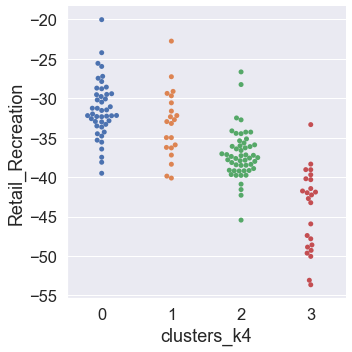

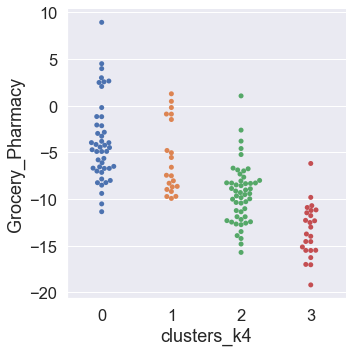

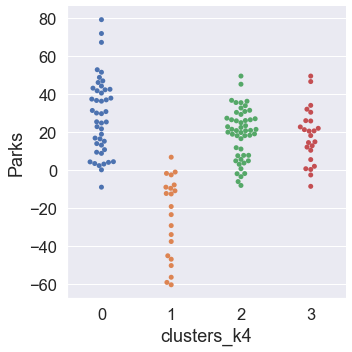

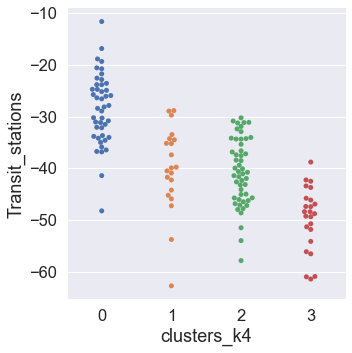

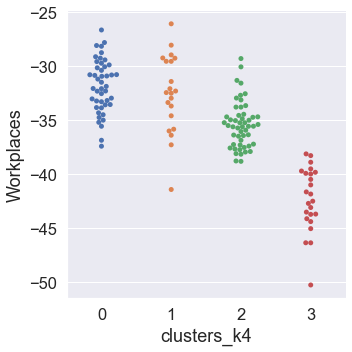

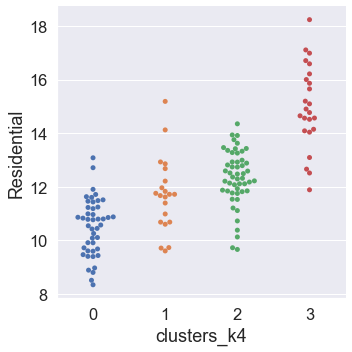

In [25]:
# Create a variable 'mobility_category'
mobility_categories = [
    "Retail_Recreation",
    "Grocery_Pharmacy",
    "Parks",
    "Transit_stations",
    "Workplaces",
    "Residential",
]

# Use a for loop to plot the clusters across the six mobility categories

for mobility_category in mobility_categories:
    sns.catplot(
        x="clusters_k4",
        y=mobility_category,
        kind="swarm",
        data=mobility_trends_UK_mean_NaNdrop,
    )

# Dimensionality Reduction via PCA

The above plots visualise each variable separately. A more informative approach would be to take into account all six dimensions simultaneously. However, there is a difficulty in visualising and perceiving multidimensional data beyond two or three dimensions. One solution is to use the dimensionality reduction technique Principal Component Analysis (PCA).

We can apply the PCA to reduce the six mobility trends to just 2 dimensions, and then use those 2-dimensional approximations to visualise our clusters using a scatter plot.

The `sklearn` library is very consistent so the workflow we used to run `k-means` applies to `PCA` too. We first initialise the [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) estimator using the default arguments except for `n_components` where we specify to keep only 2 components. Then we perform the estimator using the `fit()` method. Below we use the `fit_transform()` method to simultaneously fit the estimator to data and apply the dimensionality-reduction transformation to data.  

In [26]:
# We reuse our standardised data set
mobility_trends_UK_standardised

array([[-2.41537629e+00, -5.87410490e-01,  2.10134074e-01,
        -7.91288930e-01, -1.67445518e+00,  1.27693514e+00],
       [ 1.31187764e+00, -6.92727365e-01,  2.89076997e-01,
        -1.75449527e-01, -4.93614030e-01,  5.60796729e-02],
       [ 1.70485729e+00,  3.33177282e-01, -6.06512500e-02,
         7.02741514e-01,  3.25763531e-01, -6.67998047e-01],
       [ 1.11969050e+00,  6.48938482e-02, -1.83621506e+00,
        -1.55202810e+00,  2.95115745e-01,  3.87645364e-01],
       [ 1.48147561e+00,  1.65066306e+00, -3.54839347e-01,
        -3.51770707e-01, -2.21840285e-01,  2.93929581e-01],
       [ 2.00258288e+00,  2.11421107e-01,  3.05692453e-01,
         2.65069849e+00,  3.83734106e-01, -1.67810664e+00],
       [ 1.09194483e+00,  6.58562770e-01, -4.56719269e-01,
         4.51770033e-01,  9.42324863e-01, -8.67190528e-01],
       [-2.21396518e+00, -1.85507507e+00,  4.28819439e-01,
        -9.18325110e-01, -2.03772158e+00,  1.31997203e+00],
       [-3.28335111e-01, -9.81312186e-01, -4.813

In [27]:
# Initialise the Principal component analysis (PCA) algorithm with 2 components
pca = PCA(n_components=2)

# Apply the dimensionality reduction on the six mobility categories
pca_components = pca.fit_transform(mobility_trends_UK_standardised)

# Transformed values arranged as observations/samples in rows
# and number of components in columns
pca_components

array([[ 3.05048664e+00, -3.17134262e-01],
       [ 4.05220779e-02, -3.23107889e-01],
       [-1.66728899e+00, -9.58314439e-03],
       [ 1.87640960e-01,  2.20371174e+00],
       [-9.36968706e-01,  5.59535600e-01],
       [-3.10038586e+00, -8.31210709e-01],
       [-1.80731273e+00,  5.21006053e-01],
       [ 3.72895574e+00, -6.37136213e-01],
       [ 9.73241512e-01,  6.59415885e-01],
       [ 1.82555443e+00,  7.43200181e-01],
       [-7.88387434e-01,  2.10113385e+00],
       [-2.64694215e+00, -1.56654726e-01],
       [-5.21128998e-01,  7.71996986e-01],
       [ 2.88282276e+00,  3.69933394e-02],
       [ 7.95806245e-02,  6.71455150e-01],
       [ 3.09657291e+00, -7.88220843e-01],
       [ 4.17246911e+00, -1.29549204e+00],
       [ 2.05759103e+00, -3.35013940e-01],
       [-4.76628278e-01,  7.88229982e-01],
       [ 1.95474734e+00, -3.13181233e-01],
       [ 4.42040955e+00,  8.64391255e-01],
       [-1.13652904e+00,  1.69484026e-01],
       [-3.23532966e+00,  5.63305600e-01],
       [ 6.

Now we can run the k-means algorithm on the two principal components:

In [28]:
k = 4
kmeans_k4_pca = KMeans(
    n_clusters=k, init="k-means++", n_init=10, max_iter=300, random_state=0
)
kmeans_k4_pca.fit(pca_components)

KMeans(n_clusters=4, random_state=0)

In [29]:
# Labels of clusters to which each observation was assigned to
kmeans_k4_pca.labels_

array([3, 0, 1, 2, 2, 1, 1, 3, 0, 0, 2, 1, 2, 3, 0, 3, 3, 3, 2, 3, 3, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 0, 1, 2, 1, 1, 1, 0, 1, 2, 1, 1,
       3, 0, 0, 2, 1, 0, 3, 0, 3, 0, 1, 0, 2, 1, 3, 1, 2, 1, 1, 0, 1, 1,
       0, 0, 1, 2, 2, 0, 0, 2, 2, 2, 0, 0, 0, 1, 2, 0, 1, 1, 1, 1, 2, 1,
       0, 1, 0, 1, 3, 0, 3, 1, 0, 2, 0, 0, 1, 3, 1, 0, 2, 1, 1, 3, 1, 2,
       0, 1, 0, 3, 0, 0, 0, 1, 0, 1, 3, 0, 0, 0, 1, 0, 0, 0, 0, 3, 2, 2,
       0, 0, 0, 0, 3, 3, 0, 0, 3], dtype=int32)

In [30]:
# Add the 4-cluster assignment on the PCA components to your DataFrame
mobility_trends_UK_mean_NaNdrop["clusters_k4_pca"] = kmeans_k4_pca.labels_
mobility_trends_UK_mean_NaNdrop

,Retail_Recreation,Grocery_Pharmacy,Parks,Transit_stations,Workplaces,Residential,clusters,clusters_k4,clusters_k4_pca
sub_region_1,,,,,,,,,
Aberdeen City,-50.046371,-10.722567,20.557692,-46.127016,-42.489919,14.567010,2,3,3
Aberdeenshire,-28.253669,-11.248447,22.474684,-39.953878,-37.207661,12.222222,0,2,0
Angus Council,-25.955975,-6.125786,13.982143,-31.150943,-33.542339,10.831551,1,0,1
Antrim and Newtownabbey,-29.377358,-7.465409,-29.134328,-53.752621,-33.679435,12.859031,0,1,2
Ards and North Down,-27.262055,0.452830,6.838298,-41.721311,-35.991935,12.679039,1,1,2
...,...,...,...,...,...,...,...,...,...
Windsor and Maidenhead,-42.714885,-11.178197,0.379455,-43.693920,-43.711694,16.709220,2,3,3
Wokingham,-39.044025,-16.285115,30.458101,-51.299790,-45.034274,18.237327,2,3,3
Worcestershire,-36.025497,-9.990563,26.511954,-34.033107,-33.779758,12.112019,0,2,0


# Visualising mobility clusters

Let's plot the resulting clusters along the two principal components using a scatter plot.

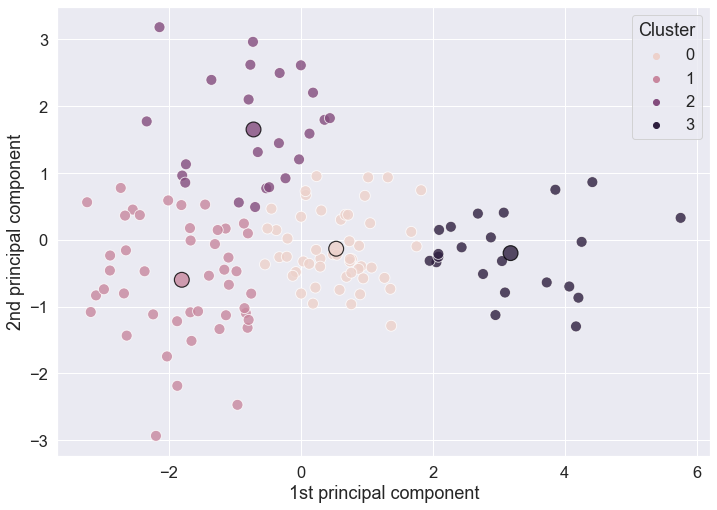

In [31]:
# Set figure size
plt.figure(figsize=(11.7, 8.27))

# Scatterplot with the 1st principal component on the horizontal x axes
# and the 2nd principal component on the vertical y axis
grid = sns.scatterplot(
    x=pca_components[:, 0],
    y=pca_components[:, 1],
    hue=kmeans_k4_pca.labels_,
    alpha=0.8,
    s=120,
)

# Add labels to the horisontal x axis and vertical y axis
labels = grid.set(xlabel="1st principal component", ylabel="2nd principal component")

# Plot the cluster centroids
sns.scatterplot(
    x=kmeans_k4_pca.cluster_centers_[:, 0],
    y=kmeans_k4_pca.cluster_centers_[:, 1],
    hue=range(k),
    s=220,
    alpha=0.8,
    ec="black",
    legend=False,
)

# Add title 'Cluster' to the legend and locate it in the upper right of the plot
plt.legend(title="Cluster", loc="upper right")

In the figure above, we plot the 1st principal component against the 2nd principal component derived from the six mobility types. Each data point is a county in the UK. Larger dots represent the cluster centroid (which is typically not a data point). Colour scheme represents cluster assignment.

The figure above lacks county labels which we would need in order to interpret our results from k-means clustering. 

Let's add labels to data points so that we can associate each county with its name. 

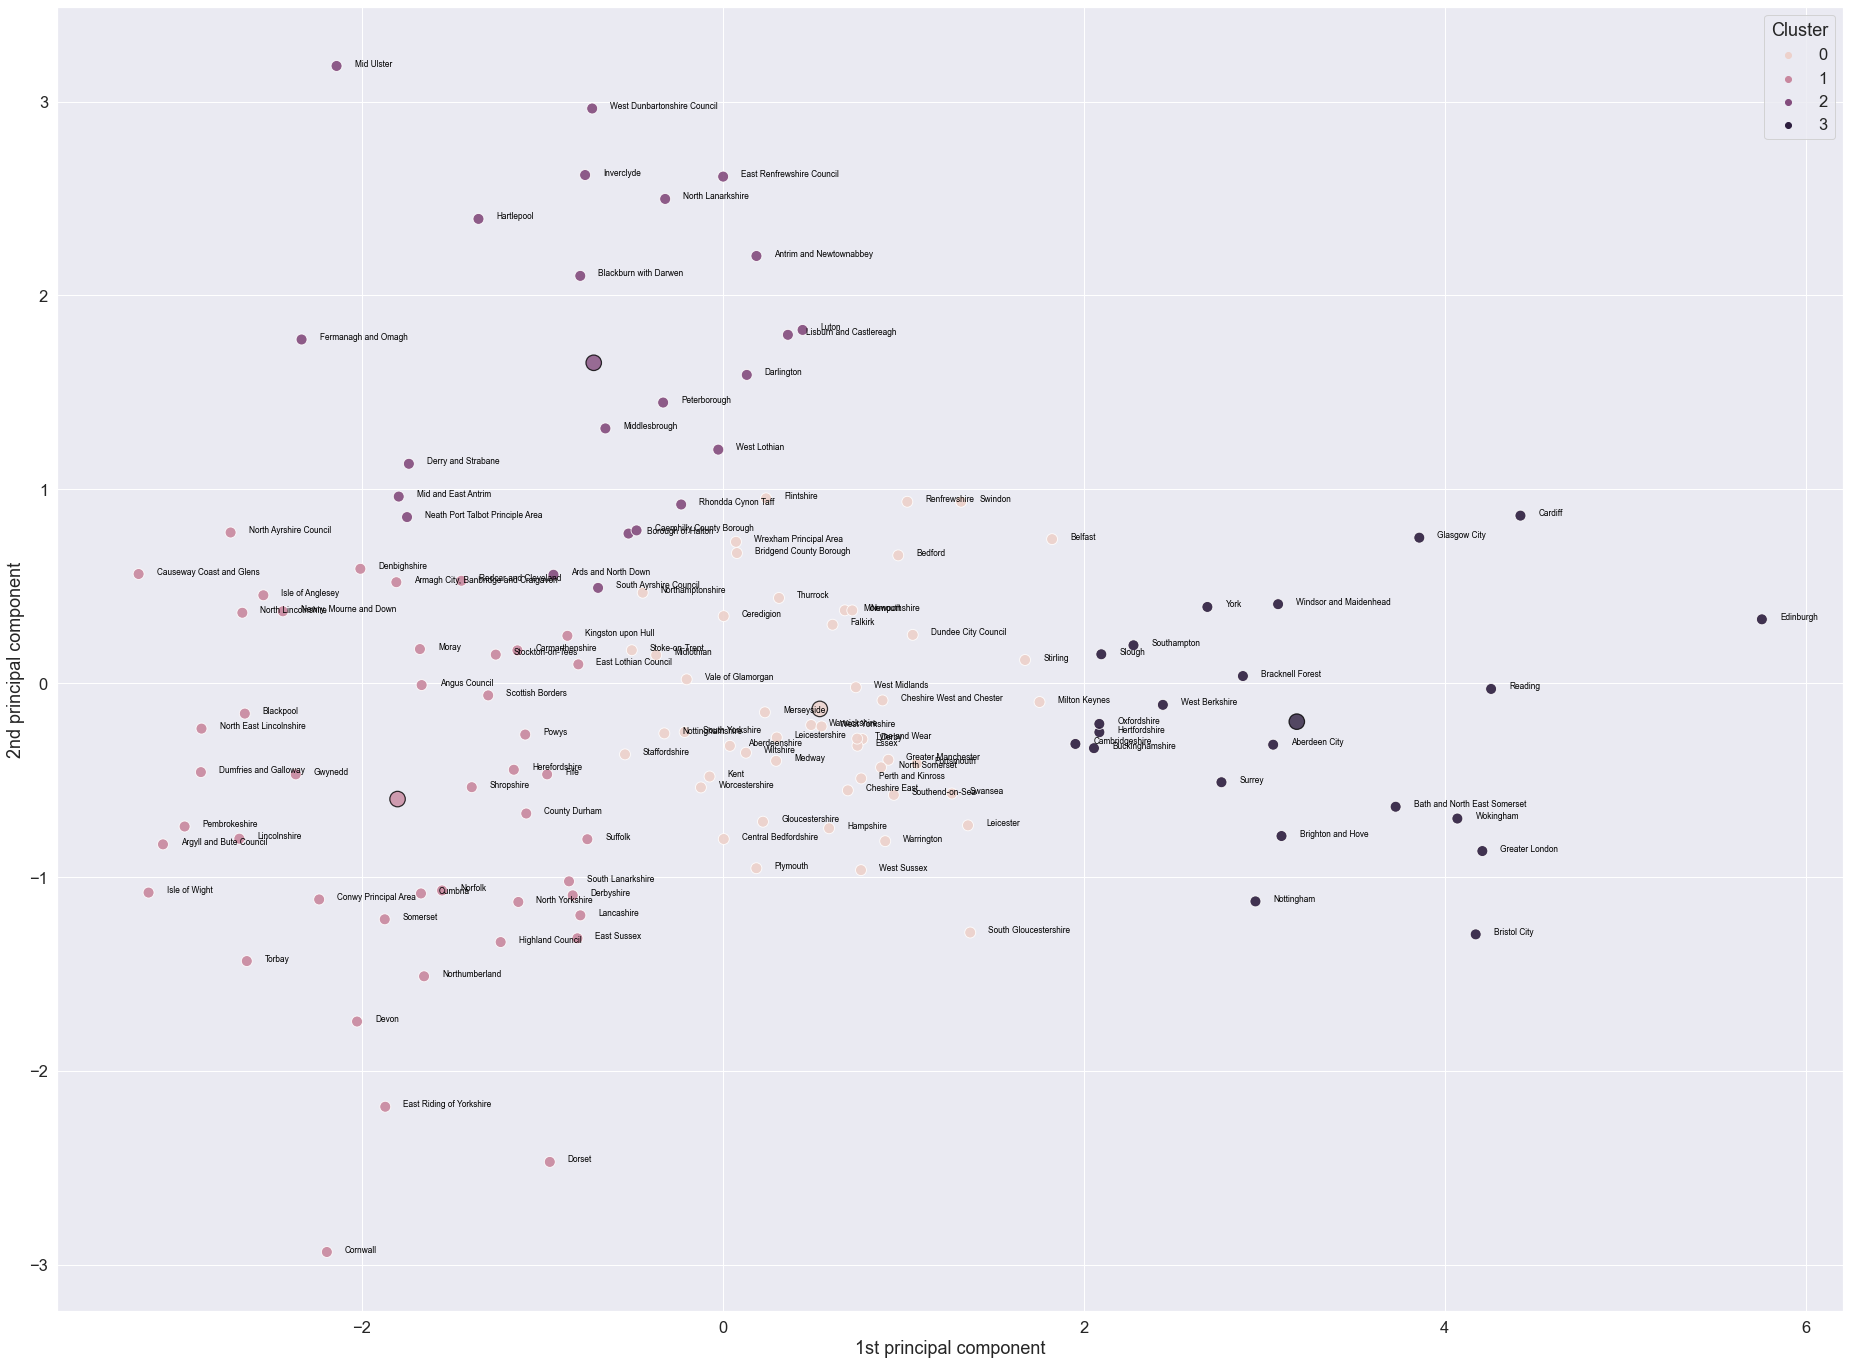

In [32]:
# Enlarge figure size
plt.figure(figsize=(32, 24))

# Scatterplot with the 1st principal component on the horizontal x axes
# and the 2nd principal component on the vertical y axis
grid = sns.scatterplot(
    x=pca_components[:, 0],
    y=pca_components[:, 1],
    hue=kmeans_k4_pca.labels_,
    alpha=0.9,
    s=120,
)

# Add labels to the horisontal x axis and vertical y axis
labels = grid.set(xlabel="1st principal component", ylabel="2nd principal component")

# Plot the cluster centroids
sns.scatterplot(
    x=kmeans_k4_pca.cluster_centers_[:, 0],
    y=kmeans_k4_pca.cluster_centers_[:, 1],
    hue=range(k),
    s=240,
    alpha=0.8,
    ec="black",
    legend=False,
)

# This for loop assign country name to each data point iteratively
for line in range(0, mobility_trends_UK_mean_NaNdrop.shape[0]):
    grid.text(
        pca_components[line, 0] + 0.1,
        pca_components[line, 1],  # where the labels should be positioned
        mobility_trends_UK_mean_NaNdrop.index[line],  # add labels to each data point
        horizontalalignment="left",
        size="small",
        color="black",
        weight=None,
    )

# Add title 'Cluster' to the legend and locate it in the upper right of the plot
plt.legend(title="Cluster", loc="upper right");

Because PCA transforms our six variables into a two-dimensional space, we cannot anymore see how a particular cluster or county is positioned with respect to any particular mobility category. 

If you need to cluster counties with regard to any pair of variables, you could run k-means on particular pairs of variables and plot the cluster assignment for those variables. For example, below we run the k-means algorithm on two variables: retail and recreation mobility and workplaces mobility.

In [33]:
# We first fit k-means to two variables retail_recreation and workplaces
# using the standardised data. We specify the number of clusters to be
# formed as k = 4  but keep in mind that we did not performed the Elbow method
# on these two variables in particular.

k = 4
kmeans_k4_2vars = KMeans(
    n_clusters=k, init="k-means++", n_init=10, max_iter=300, random_state=0
)

# 0 indicates the retail_recreation mobility variable
# and 4 indicates workplaces mobility variable
kmeans_k4_2vars.fit(mobility_trends_UK_standardised[:, [0, 4]])

KMeans(n_clusters=4, random_state=0)

Plot the resulting clusters along the two mobility variables — retail and recreation mobility and workplaces mobility — using a scatter plot.

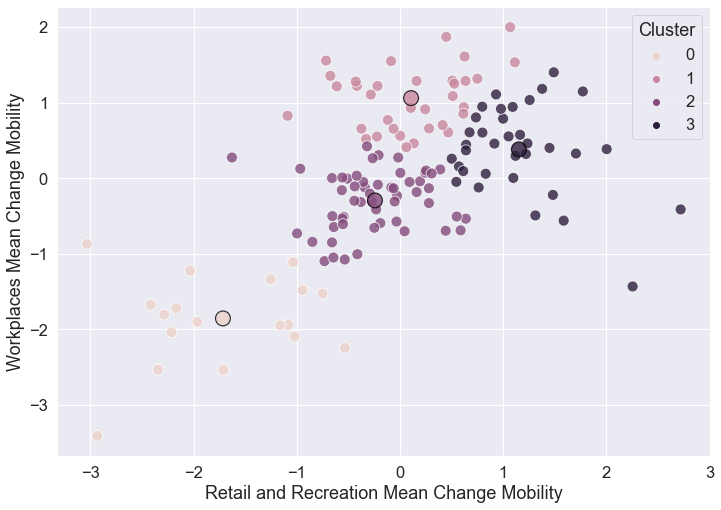

In [34]:
# Plot the clusters
plt.figure(figsize=(11.7, 8.27))

grid = sns.scatterplot(
    x=mobility_trends_UK_standardised[:, 0],
    y=mobility_trends_UK_standardised[:, 4],
    hue=kmeans_k4_2vars.labels_,
    alpha=0.8,
    s=120,
)

# Plot the centers
sns.scatterplot(
    x=kmeans_k4_2vars.cluster_centers_[:, 0],
    y=kmeans_k4_2vars.cluster_centers_[:, 1],
    hue=range(k),
    s=220,
    alpha=0.8,
    ec="black",
    legend=False,
)
grid.set(
    xlabel="Retail and Recreation Mean Change Mobility",
    ylabel="Workplaces Mean Change Mobility",
)

# Add title 'Cluster' to the legend and locate it in the upper right of the plot
plt.legend(title="Cluster", loc="upper right")

Let's add UK county labels in the figure below as we did before. 

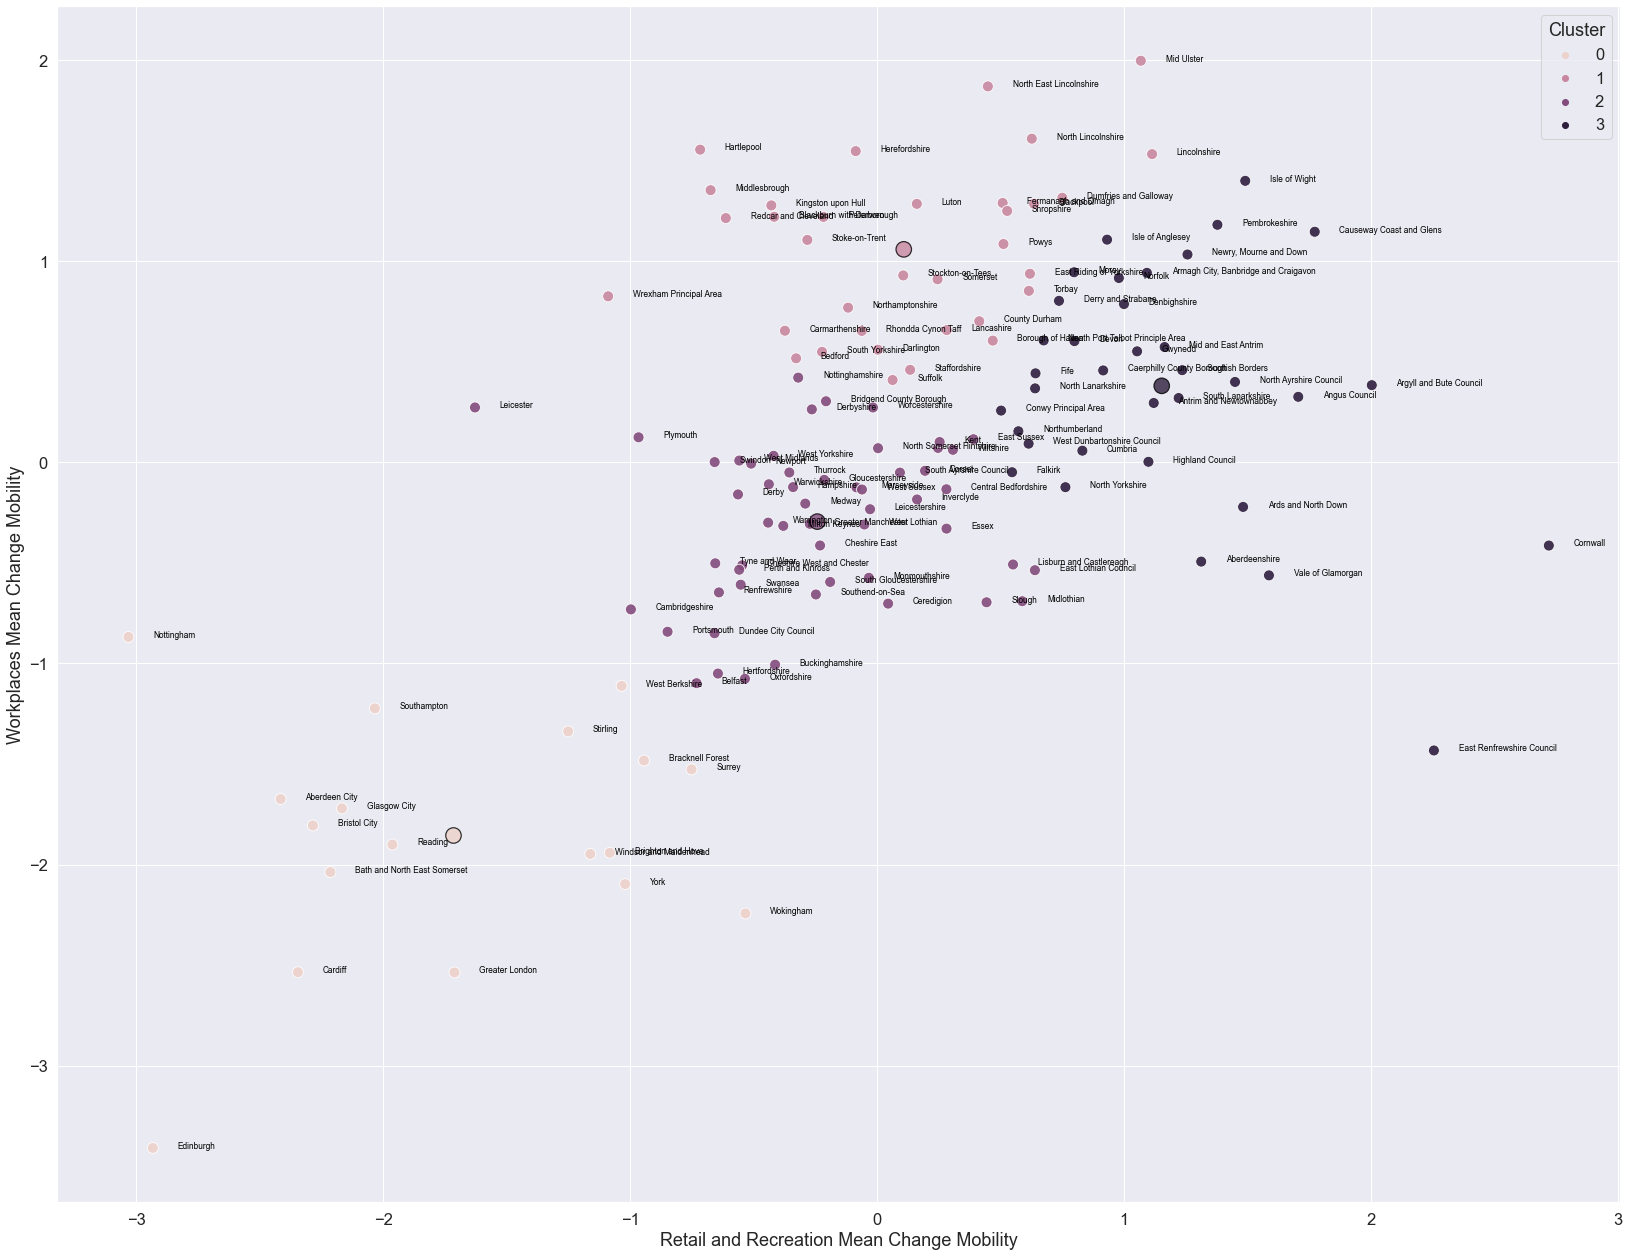

In [35]:
# Enlarge figure size
plt.figure(figsize=(28, 22))

# Scatterplot with the 1st principal component on the horizontal x axes
# and the 2nd principal component on the vertical y axis
grid = sns.scatterplot(
    x=mobility_trends_UK_standardised[:, 0],
    y=mobility_trends_UK_standardised[:, 4],
    hue=kmeans_k4_2vars.labels_,
    alpha=0.9,
    s=120,
)
grid.set(
    xlabel="Retail and Recreation Mean Change Mobility",
    ylabel="Workplaces Mean Change Mobility",
)

# Plot the cluster centroids
sns.scatterplot(
    x=kmeans_k4_2vars.cluster_centers_[:, 0],
    y=kmeans_k4_2vars.cluster_centers_[:, 1],
    hue=range(k),
    s=240,
    alpha=0.8,
    ec="black",
    legend=False,
)

# This for loop assign country name to each data point iteratively
for line in range(0, mobility_trends_UK_mean_NaNdrop.shape[0]):
    grid.text(
        mobility_trends_UK_standardised[line, 0] + 0.1,
        mobility_trends_UK_standardised[
            line, 4
        ],  # where the labels should be positioned
        mobility_trends_UK_mean_NaNdrop.index[
            line
        ],  # add labels to each data point iteratively
        horizontalalignment="left",
        size="small",
        color="black",
        weight=None,
    )

# Add title 'Cluster' to the legend and locate it in the upper right of the plot
plt.legend(title="Cluster", loc="upper right");

# Related approaches: Hierarchical clustering
Other clustering approaches include hierarchical clustering. Below is a heatmap resulting from an application of hierarchical clustering on the mobility trends data at the UK county level. See the `clustermap` function in `seaborn` for details about parameters and possible arguments. We set `z_score = 1`, meaning that data will be standardised (z-scores) on the columns. We also specify a color map `cmap = 'vlag'`, which is a kind of mapping from data values to color space. 

The heatmap displays similarities between mobility categories (columns) and counties in the UK (rows). 

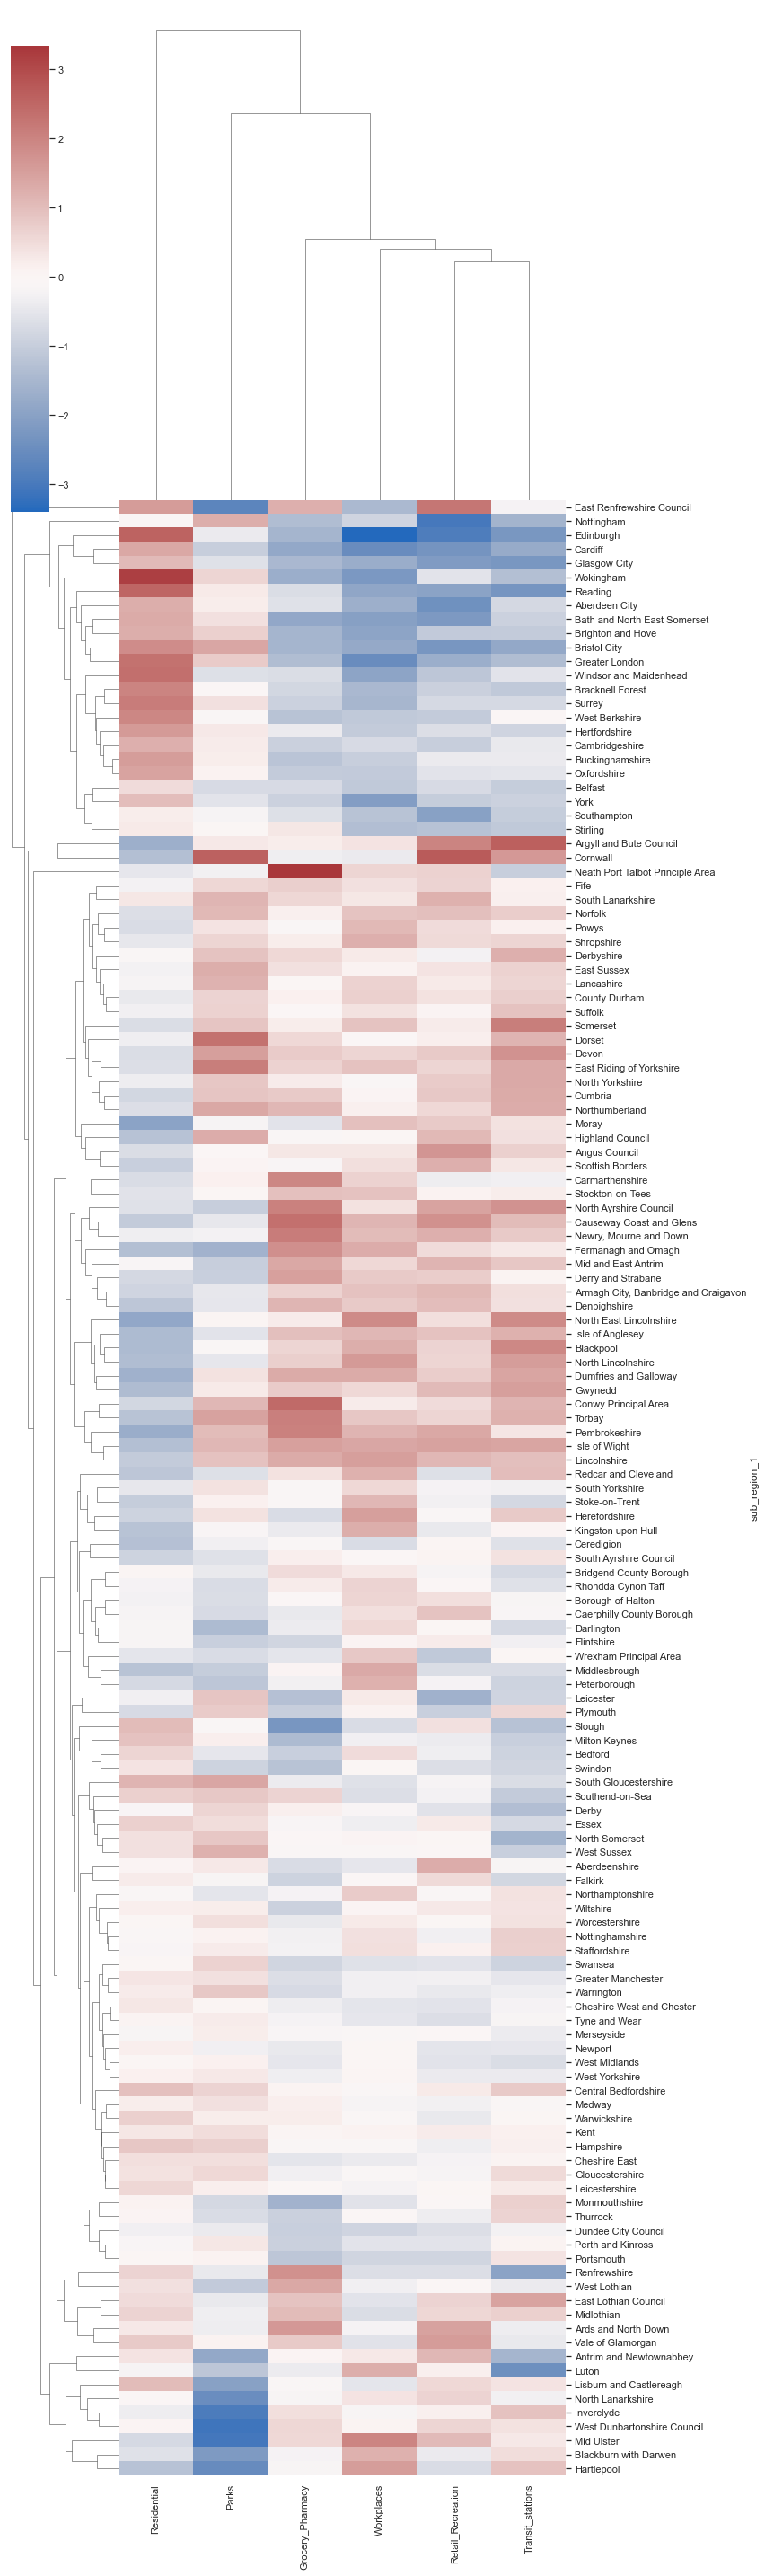

In [36]:
# Hierarchically-clustered heatmap

# Decrease font size to fit all county labels
sns.set(font_scale=1)

sns.clustermap(
    mobility_trends_UK_mean_NaNdrop.iloc[:, 0:6],
    z_score=1,
    cmap="vlag",
    figsize=(12, 40),
)

# Hands-on exercise
You would like to know whether mobility trends in the UK over the last year of the pandemic were similar to the mobility trends in some other countries, and to which countries in particular.

To learn this, you use k-means clustering to group world countries in the COVID-19 Community Mobility Reports data set according to their mobility across mobility categories.

Write your Python code and Markdown below.

Below is a solution to the hands-on exercise.

In [37]:
# Compute mean mobility trends by country and remove NaN (Not a Number) values
mobility_trends_countries = (
    mobility_trends.groupby("country_region")[
        [
            "Retail_Recreation",
            "Grocery_Pharmacy",
            "Parks",
            "Transit_stations",
            "Workplaces",
            "Residential",
        ]
    ]
    .mean()
    .dropna()
)
mobility_trends_countries.head()

,Retail_Recreation,Grocery_Pharmacy,Parks,Transit_stations,Workplaces,Residential
country_region,,,,,,
Afghanistan,14.629630,37.950231,6.611236,-4.188804,-7.533917,4.368709
Angola,-12.054187,-0.541706,6.636268,-27.115071,-11.890746,7.796813
Antigua and Barbuda,-18.242138,-8.100629,33.349057,-43.980952,-33.560899,4.367725
Argentina,-41.844881,-8.477221,-59.743529,-46.950210,-12.739573,10.504889
Aruba,-19.974843,-6.563941,12.723270,-45.807128,-21.149194,5.266667


In [38]:
# Data standardisation
scaler = StandardScaler()
StandardisedData = scaler.fit_transform(mobility_trends_countries)
StandardisedData

array([[ 2.60971986e+00,  2.72237961e+00,  3.47561843e-01,
         1.37660526e+00,  1.40145901e+00, -6.80948462e-01],
       [ 5.37783963e-01, -2.72062247e-02,  3.48512303e-01,
        -1.55760852e-01,  9.02158250e-01,  6.76779321e-02],
       [ 5.73040443e-02, -5.67161074e-01,  1.36277535e+00,
        -1.28305749e+00, -1.58128178e+00, -6.81163370e-01],
       [-1.77539368e+00, -5.94062123e-01, -2.17187512e+00,
        -1.48151933e+00,  8.04881058e-01,  6.59065338e-01],
       [-7.72363952e-02, -4.57391215e-01,  5.79630869e-01,
        -1.40511702e+00, -1.58877118e-01, -4.84853223e-01],
       [ 6.85588402e-01,  1.35974506e-01, -3.45209638e-01,
        -3.95424093e-01,  9.96267366e-01, -1.50054232e-01],
       [-9.59256359e-01, -4.91423251e-01,  1.70358047e-01,
        -1.04091624e-02, -7.87004065e-01, -1.42716295e-02],
       [-4.00453115e-01, -5.48873754e-01, -9.93222721e-01,
         3.57482646e-01,  1.16189086e-01,  6.58432689e-01],
       [ 2.80588000e-01,  6.12406852e-01,  7.551

In [39]:
# Run PCA with two components
pca_countries = PCA(n_components=2)
pca_countries = pca_countries.fit_transform(StandardisedData)
pca_countries

array([[-3.99016687e+00,  7.45478364e-01],
       [-6.06845801e-01,  2.89283308e-01],
       [ 7.63659966e-01, -2.19230651e+00],
       [ 2.32057062e+00,  2.10239002e+00],
       [ 5.72102336e-01, -7.20155393e-01],
       [-5.64747850e-01,  8.55920787e-01],
       [ 9.41844934e-01, -6.74254911e-01],
       [ 7.71024049e-01,  9.38877429e-01],
       [-1.32368338e+00,  1.03287876e+00],
       [ 2.47774589e+00, -1.19196393e+00],
       [-1.68519673e+00, -6.15938441e-01],
       [ 6.66457601e-01, -1.70202543e+00],
       [ 8.98595586e-01, -8.52468676e-01],
       [-3.02763069e+00,  3.62569086e-01],
       [ 2.46416516e+00,  8.36796320e-01],
       [-1.43099629e+00, -3.84012433e-01],
       [-2.45986827e+00, -1.49673660e-01],
       [-3.53389857e-01,  1.87222486e+00],
       [-9.21811801e-01, -6.69920702e-01],
       [-4.68033064e+00,  4.23018062e-01],
       [ 1.57607279e+00,  3.90821641e-01],
       [-2.37166071e+00,  8.79282529e-01],
       [ 3.35456370e-03, -1.39772761e+00],
       [ 3.

In [40]:
# Select optimal number of clusters, k

Sum_of_squared_differences_countries = []

K = range(1, 31)
for k in K:
    kmeans_countries = KMeans(n_clusters=k)
    kmeans_countries.fit(pca_countries)
    Sum_of_squared_differences_countries.append(kmeans_countries.inertia_)

In [41]:
Sum_of_squared_differences_countries

[593.6468345005125,
 304.3305477620855,
 206.67194353683982,
 148.95634380079338,
 121.28174974759105,
 97.43999961101579,
 80.83841686606813,
 68.90853268223835,
 60.22874329306373,
 54.14883465310518,
 48.573875243346166,
 45.43947822211138,
 40.28743116061935,
 37.842849347016006,
 34.45415389681908,
 33.05362269834717,
 31.83094041245218,
 28.85520473381342,
 26.095529452652656,
 24.52245402734946,
 23.495979871278994,
 22.14922258419889,
 19.607214460726738,
 18.627583942264145,
 17.74833201042812,
 16.640232091054198,
 16.03881696384903,
 14.79872891026243,
 13.496850551112397,
 13.02564592378948]

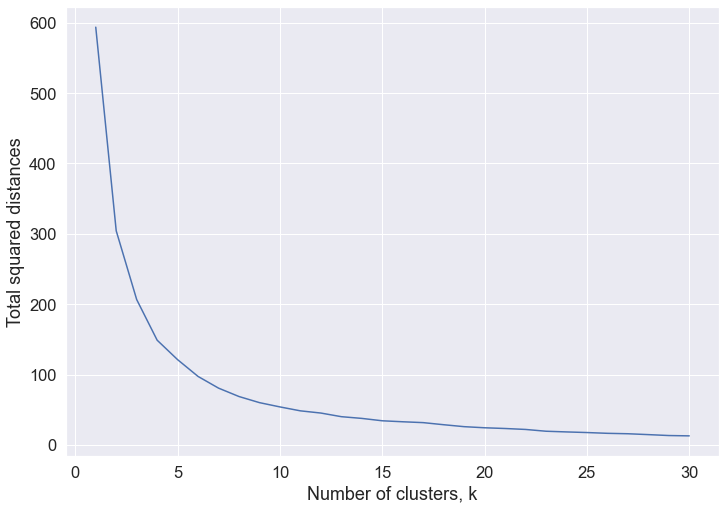

In [42]:
# Plot the number of clusters against the sum of squared differences

# Plot and font size
plt.figure(figsize=(11.7, 8.27))
sns.set(font_scale=1.5)

# Generate the plot
grid = sns.lineplot(x=K, y=Sum_of_squared_differences_countries)

# Add x and y labels
labels = grid.set(xlabel="Number of clusters, k", ylabel="Total squared distances")

In [43]:
# k = 4 appears optimal so we specify n_clusters=4  and run the KMeans algorithm
kmeans_countries_k4 = KMeans(n_clusters=4)
kmeans_countries_k4.fit(pca_countries)

KMeans(n_clusters=4)

In [44]:
# Labels of clusters each country belongs to
kmeans_countries_k4.labels_

array([3, 0, 2, 1, 2, 0, 2, 0, 0, 1, 2, 2, 2, 3, 1, 2, 3, 0, 2, 3, 1, 3,
       2, 1, 1, 1, 1, 2, 2, 3, 2, 1, 1, 3, 1, 2, 0, 2, 2, 2, 2, 2, 0, 2,
       1, 2, 1, 0, 2, 0, 0, 3, 1, 2, 2, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2, 3,
       2, 2, 1, 3, 2, 1, 1, 2, 3, 1, 0, 1, 0, 1, 2, 0, 0, 3, 0, 2, 2, 1,
       3, 1, 3, 1, 1, 1, 2, 1, 1, 0, 2, 2, 1, 0, 0, 2, 1, 2, 1, 1, 3, 2,
       1, 2, 2, 0, 0, 0, 0, 1, 3, 1, 2, 0, 2, 0, 1, 2, 0, 1, 0, 3, 3, 0],
      dtype=int32)

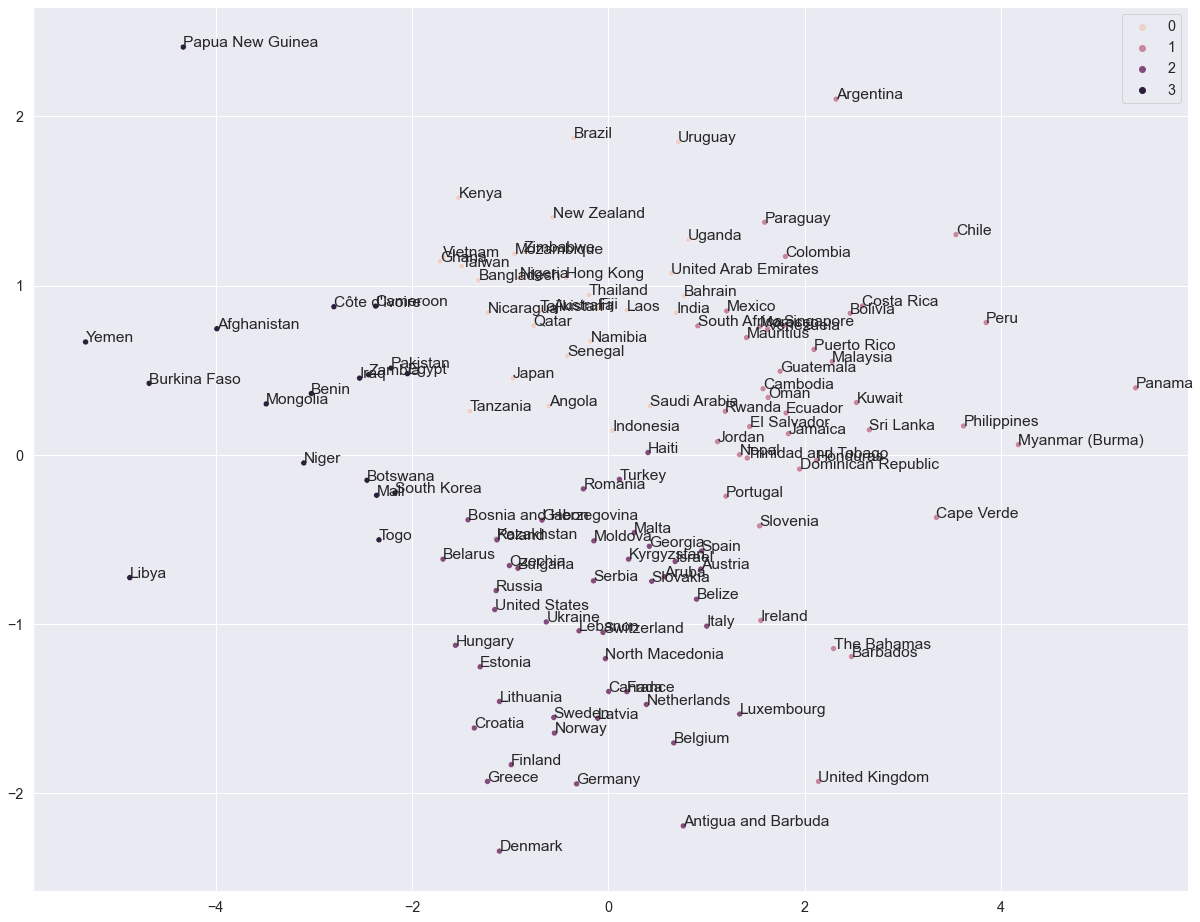

In [45]:
# Plot the clusters along the two principal components

sns.set(font_scale=1.3)
plt.figure(figsize=(20.7, 16.27))

grid = sns.scatterplot(
    x=pca_countries[:, 0], y=pca_countries[:, 1], hue=kmeans_countries_k4.labels_
)

for label in range(0, mobility_trends_countries.shape[0]):
    grid.text(
        pca_countries[label, 0],
        pca_countries[label, 1],
        mobility_trends_countries.index[label],
    )

In [46]:
# Add the cluster membership as a new column
mobility_trends_countries["clusters_countries_k4"] = kmeans_countries_k4.labels_
mobility_trends_countries

,Retail_Recreation,Grocery_Pharmacy,Parks,Transit_stations,Workplaces,Residential,clusters_countries_k4
country_region,,,,,,,
Afghanistan,14.629630,37.950231,6.611236,-4.188804,-7.533917,4.368709,3
Angola,-12.054187,-0.541706,6.636268,-27.115071,-11.890746,7.796813,0
Antigua and Barbuda,-18.242138,-8.100629,33.349057,-43.980952,-33.560899,4.367725,2
Argentina,-41.844881,-8.477221,-59.743529,-46.950210,-12.739573,10.504889,1
Aruba,-19.974843,-6.563941,12.723270,-45.807128,-21.149194,5.266667,2
...,...,...,...,...,...,...,...
Venezuela,-30.187251,-5.294821,-25.338645,-35.782869,-20.547809,12.866534,1
Vietnam,-17.849583,-1.788475,-19.921904,-16.383344,-3.686304,-3.852658,0
Yemen,22.608782,35.235060,24.800839,10.733753,-0.384462,2.203187,3


In [47]:
# Check in which cluster the United Kingdom was assigned
UK_cluster = mobility_trends_countries[
    mobility_trends_countries.index == "United Kingdom"
]
UK_cluster

,Retail_Recreation,Grocery_Pharmacy,Parks,Transit_stations,Workplaces,Residential,clusters_countries_k4
country_region,,,,,,,
United Kingdom,-36.80968,-8.658667,28.105415,-38.142992,-35.856338,12.764187,1


In [48]:
# Access the UK cluster label
UK_cluster.clusters_countries_k4[0]

1

In [49]:
# Identify which other countries were assigned to the same cluster as
# the United Kingdom. These countries were found to be similar to
# the United Kingdom in terms of mobility trends since mid-February 2020.
mobility_trends_countries[
    mobility_trends_countries.clusters_countries_k4
    == UK_cluster.clusters_countries_k4[0]
]

,Retail_Recreation,Grocery_Pharmacy,Parks,Transit_stations,Workplaces,Residential,clusters_countries_k4
country_region,,,,,,,
Argentina,-41.844881,-8.477221,-59.743529,-46.950210,-12.739573,10.504889,1
Barbados,-28.920833,-21.027198,-2.568820,-48.604196,-35.294311,7.961740,1
Bolivia,-34.237756,-16.888959,-30.541595,-40.778590,-21.111781,13.924102,1
Cambodia,-18.744566,-14.834839,-21.219523,-40.810991,-23.098286,11.036915,1
Cape Verde,-37.539932,-15.226971,-31.050916,-61.708897,-35.132780,8.541126,1
Chile,-43.175436,-24.218896,-47.080019,-42.491373,-22.204740,16.739138,1
Colombia,-34.484833,-11.973455,-31.031449,-35.618999,-15.789791,12.373928,1
Costa Rica,-34.962151,-15.964143,-44.117530,-41.059761,-25.007968,11.380478,1
Dominican Republic,-30.151327,-9.214685,-32.295794,-35.217581,-32.856045,7.742787,1
